# Imports

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import skew

# Load Data

In [71]:
df = pd.read_csv("archive/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [218]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Visualize Distributions

## Functions

In [107]:
def view_binary(df,column):
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    
    # Boxplot
    axes[0].boxplot(df[column])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Value')
    axes[0].set_title('Boxplot')
    
    # Histogram
    axes[1].hist(df[column], bins=2, color='skyblue', edgecolor='black')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram')

    # Boxplot
    axes[2].boxplot([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], tick_labels=['Non-Diabetic', 'Prediabetic', 'Diabetic'])
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Value')
    axes[2].set_title('Boxplot')

    # Stacked Histogram
    axes[3].hist([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], 
                 bins=2, alpha=0.7, label=['Non-Diabetic', 'Prediabetic', 'Diabetic'], stacked=True, color=['skyblue','red','green'], edgecolor='black')
    axes[3].set_xlabel(column)
    axes[3].set_ylabel('Frequency')
    axes[3].set_title('Histogram')

    plt.tight_layout()
    plt.legend()
    plt.show()


In [98]:
def view_continuous(df,column,bins=30):
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    
    # Boxplot
    axes[0].boxplot(df[column])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Value')
    axes[0].set_title('Boxplot')

    # Histogram
    axes[1].hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram')
    
    # Boxplot
    axes[2].boxplot([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], tick_labels=['Non-Diabetic', 'Prediabetic', 'Diabetic'])
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Value')
    axes[2].set_title('Boxplot')

    # Stacked Histogram
    axes[3].hist([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], 
                 bins=bins, alpha=0.7, label=['Non-Diabetic', 'Prediabetic', 'Diabetic'], stacked=True, color=['skyblue','red','green'], edgecolor='black')
    axes[3].set_xlabel(column)
    axes[3].set_ylabel('Frequency')
    axes[3].set_title('Histogram')

    
    
    plt.tight_layout()
    plt.legend(['Non-Diabetic', 'Prediabetic', 'Diabetic'])
    plt.show()

In [5]:
def col_summary(df,column):
    print("Mean: {}".format(df[column].mean()))
    print("Standard Deviation: {}".format(df[column].std()))
    print("Median: {}".format(df[column].median()))
    print("Min: {}".format(df[column].min()))
    print("Max: {}".format(df[column].max()))

In [6]:
def draw_heat_graph(df):
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Heatmap for dataframe")
    plt.show()

Green is for diabetic, blue is non-diabetic, red is prediabetic

## Categorical

### Diabetes

Obviously the distributions for the Diabetes_012 column is not uniform

(array([213703.,   4631.,  35346.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

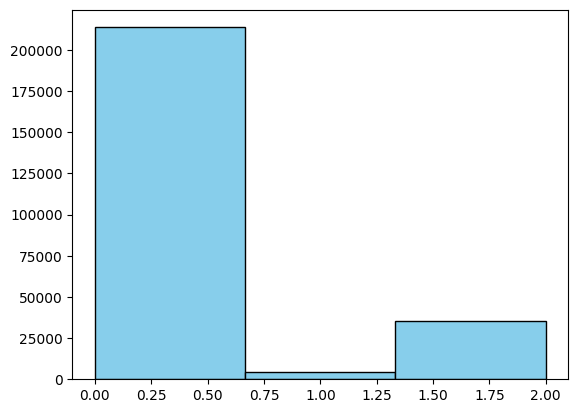

In [34]:
# Generate random data for the histogram
data_diabetes = df['Diabetes_012']
 
# Plotting a basic histogram
plt.hist(data_diabetes, bins=3, color='skyblue', edgecolor='black')

### High Blood Pressure

Most diabetics and prediabetics have high blood pressure

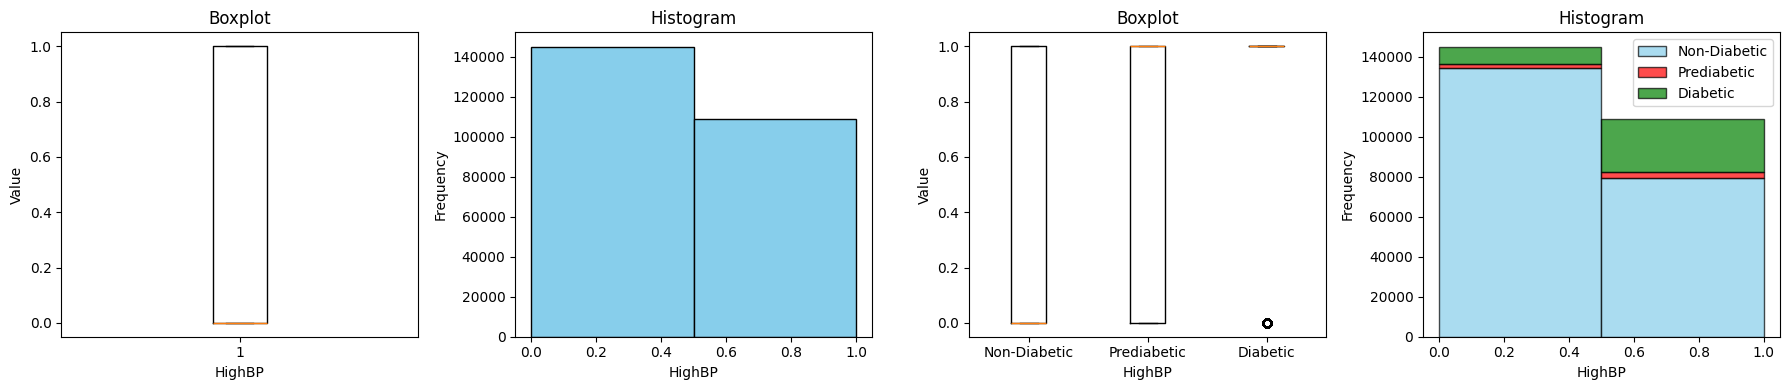

In [108]:
view_binary(df,'HighBP')

In [9]:
print (df[df.HighBP == 1].shape[0])
print (df[df.HighBP == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HighBP == 1].shape[0] - df[df.HighBP == 0].shape[0])))

108829
144851
Difference between the two values is 36022


### High Cholesterol

Most diabetics and prediabetics have high cholesterol

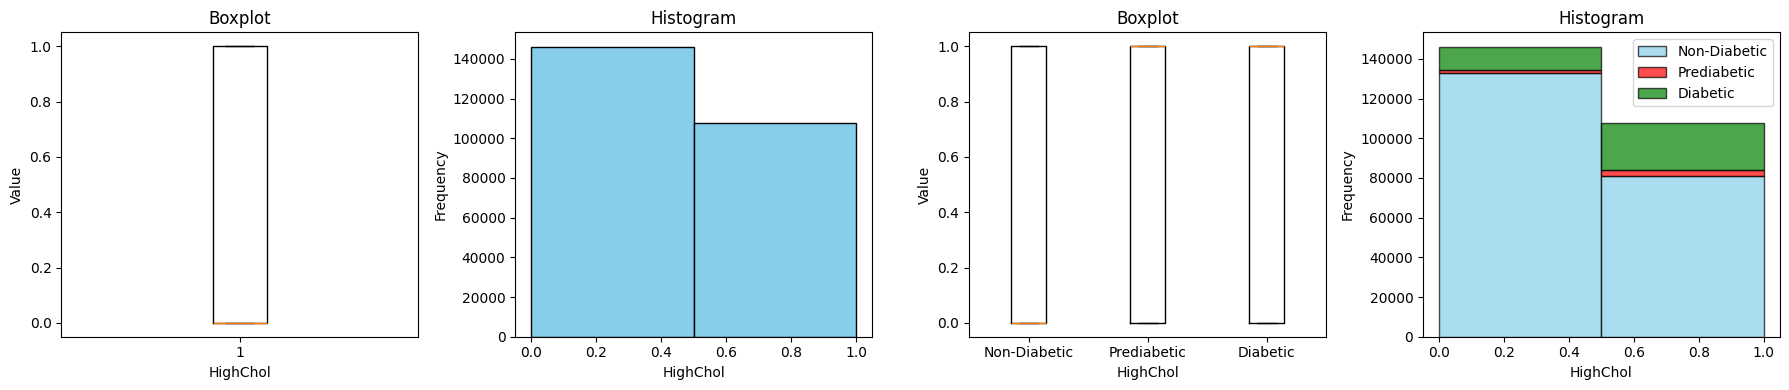

In [109]:
view_binary(df,'HighChol')

In [11]:
print (df[df.HighChol == 1].shape[0])
print (df[df.HighChol == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HighChol == 1].shape[0] - df[df.HighChol == 0].shape[0])))

107591
146089
Difference between the two values is 38498


### Cholesterol Check 
#### (Has the person checked their cholesterol in the last 5 years?)

Cholesterol checks seem to be irrelevant

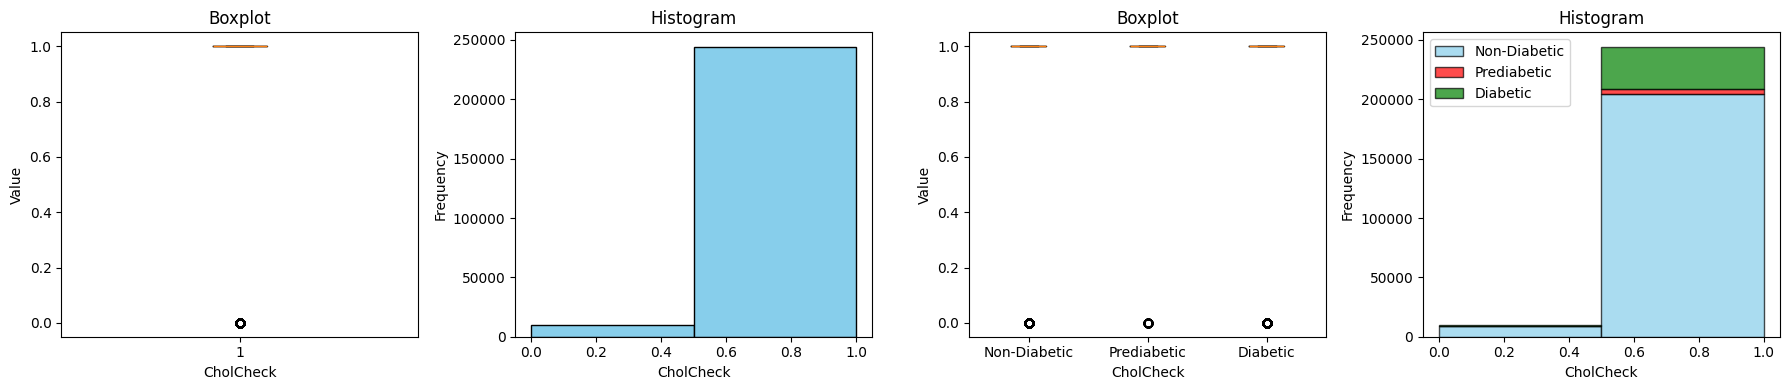

In [110]:
view_binary(df,'CholCheck')

In [13]:
print (df[df.CholCheck == 1].shape[0])
print (df[df.CholCheck == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.CholCheck == 1].shape[0] - df[df.CholCheck == 0].shape[0])))

244210
9470
Difference between the two values is 234740


### Stroke

Strokes, on first inspection, don't seem to affect odds of diabetes that much

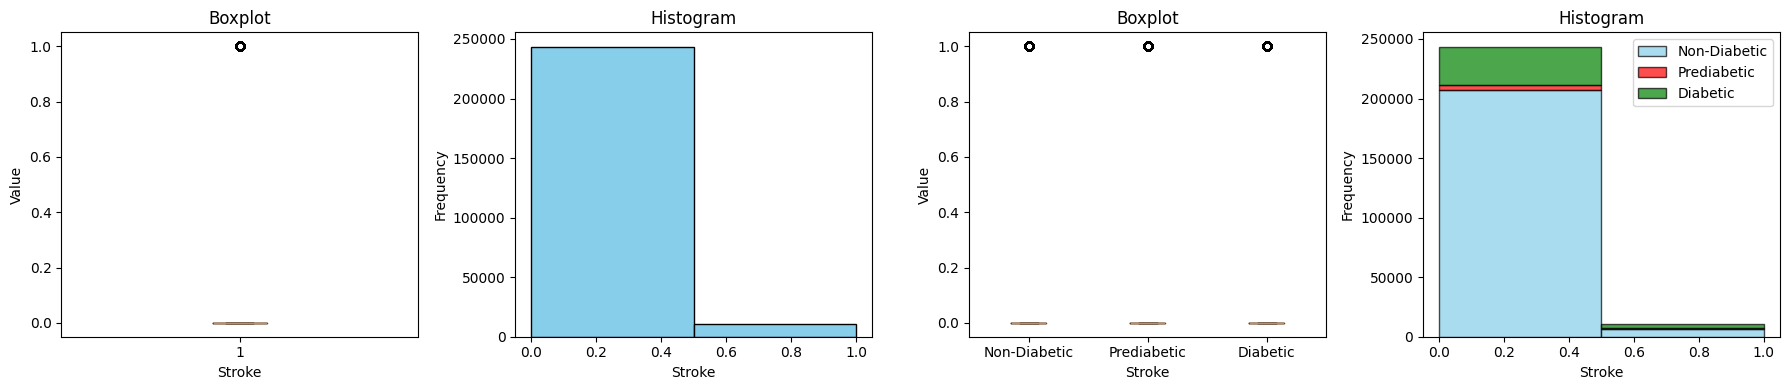

In [111]:
view_binary(df,'Stroke')

In [15]:
print (df[df.Stroke == 1].shape[0])
print (df[df.Stroke == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Stroke == 1].shape[0] - df[df.Stroke == 0].shape[0])))

10292
243388
Difference between the two values is 233096


### Heart Disease or Attack

Heart diseases or attacks, on first inspection, don't seem to affect odds of diabetes that much

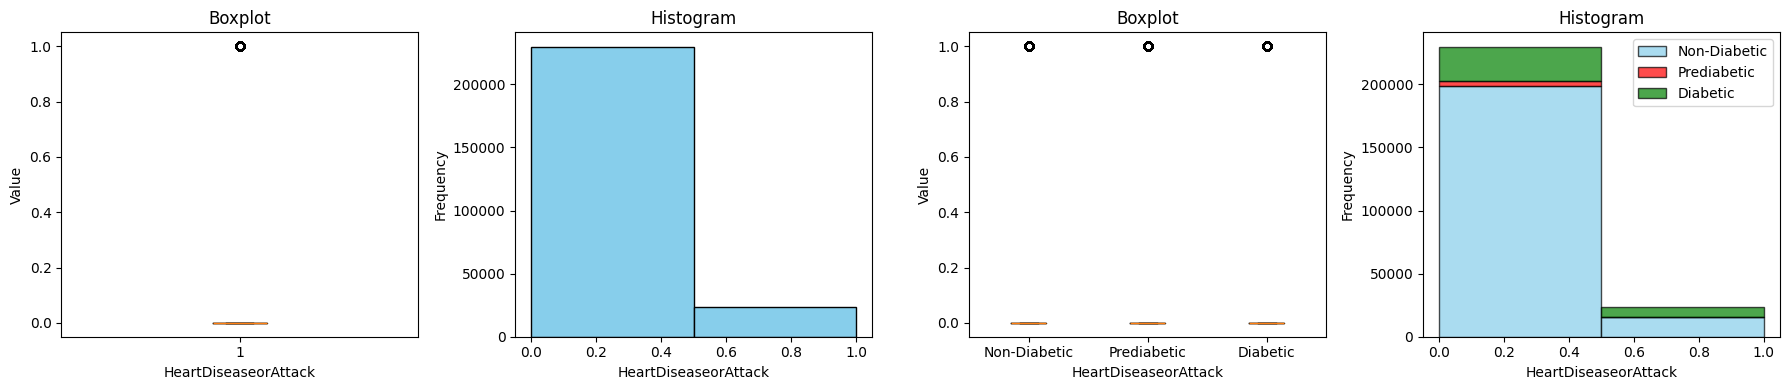

In [112]:
view_binary(df,'HeartDiseaseorAttack')

In [17]:
print (df[df.HeartDiseaseorAttack == 1].shape[0])
print (df[df.HeartDiseaseorAttack == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HeartDiseaseorAttack == 1].shape[0] - df[df.HeartDiseaseorAttack == 0].shape[0])))

23893
229787
Difference between the two values is 205894


### Physical Activity in the Last 30 Days

The only non-diabetics that reported no physical activity in the last 30 days were outliars

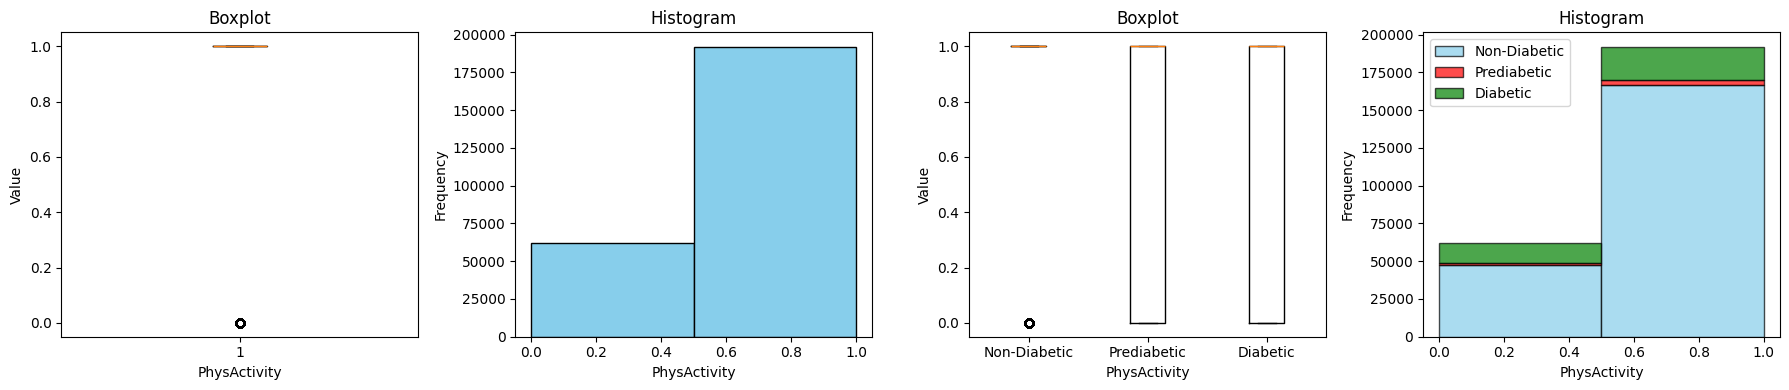

In [113]:
view_binary(df,'PhysActivity')

### Consume Fruits One or More Times a Day

Seemingly irrelevant to prediction

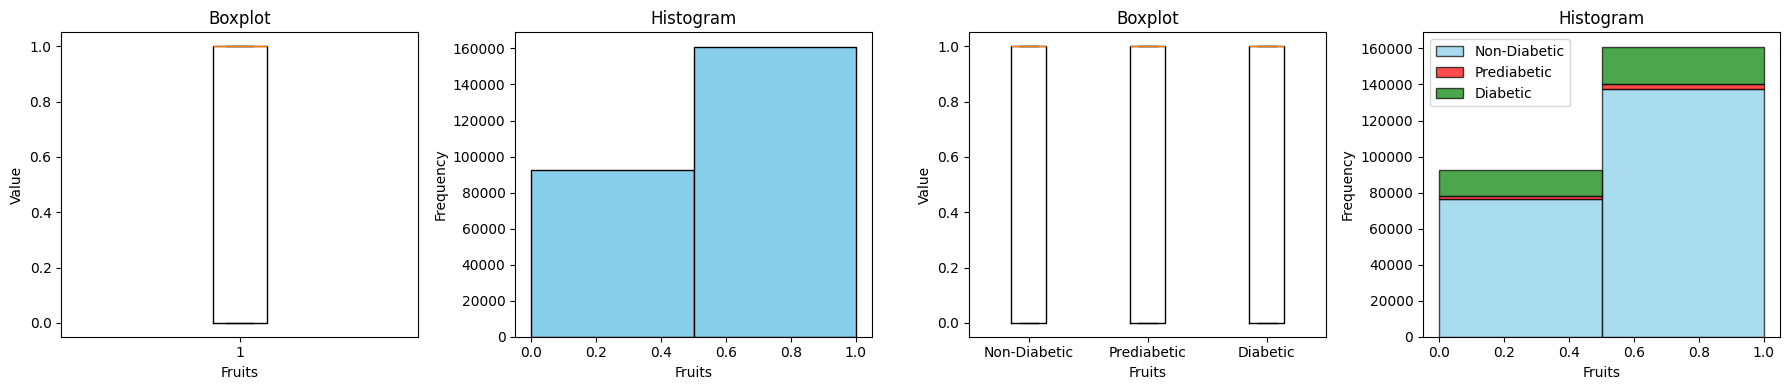

In [114]:
view_binary(df,'Fruits')

### Consume Veggies One or More Times a Day

Seemingly irrelevant to prediction

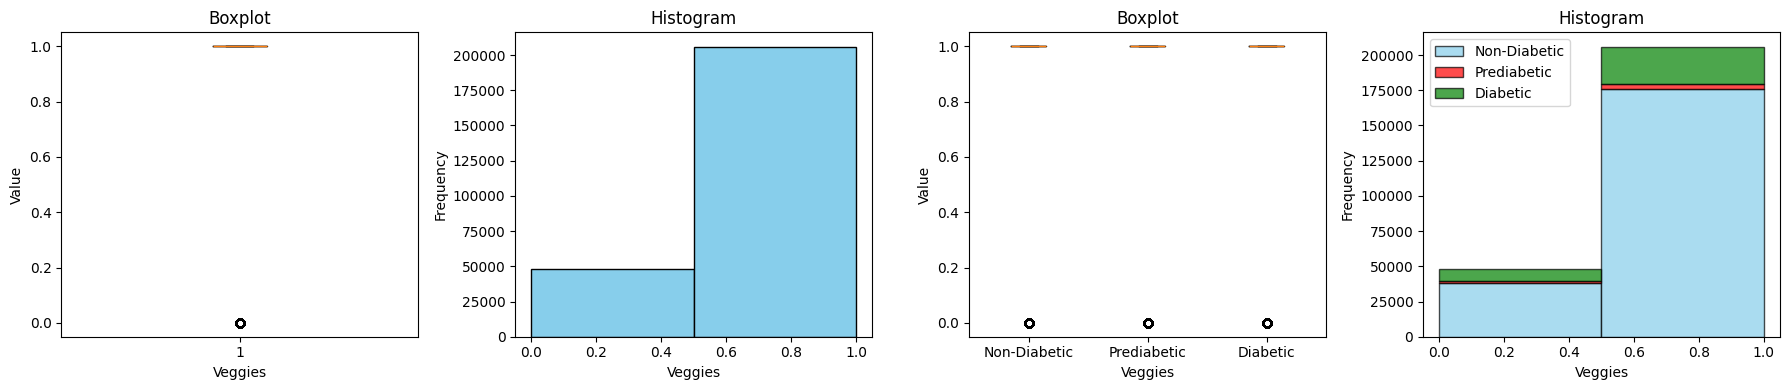

In [115]:
view_binary(df,'Veggies')

In [83]:
print (df[df.Veggies == 1].shape[0])
print (df[df.Veggies == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Veggies == 1].shape[0] - df[df.Veggies == 0].shape[0])))

205841
47839
Difference between the two values is 158002


### Heavy drinkers 
#### (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Seemingly irrelevant to prediction

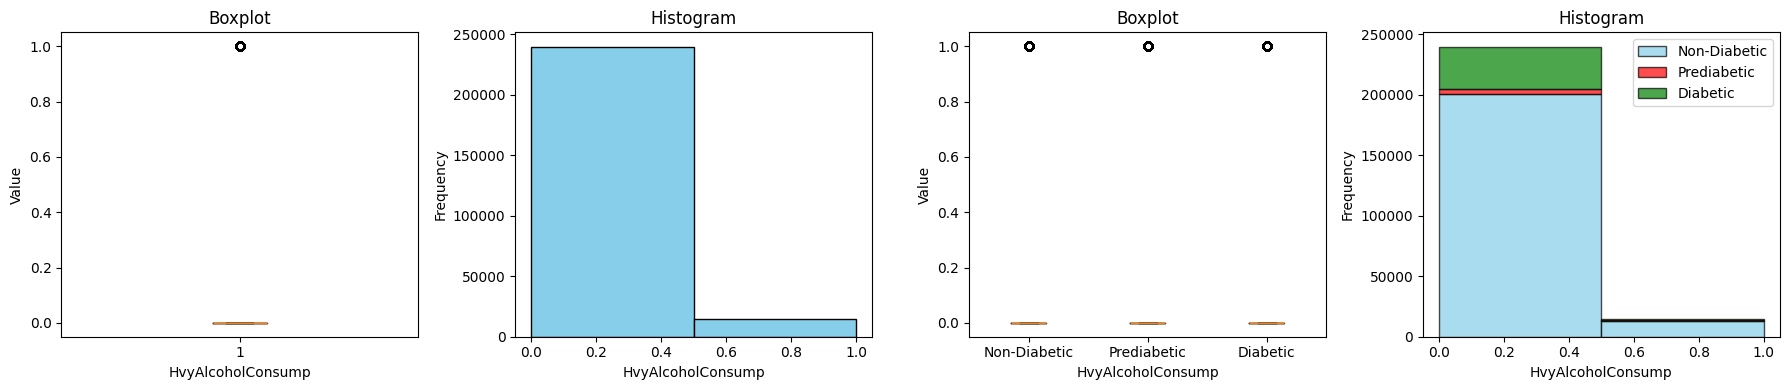

In [116]:
view_binary(df,'HvyAlcoholConsump')

In [84]:
print (df[df.HvyAlcoholConsump == 1].shape[0])
print (df[df.HvyAlcoholConsump == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HvyAlcoholConsump == 1].shape[0] - df[df.HvyAlcoholConsump == 0].shape[0])))

14256
239424
Difference between the two values is 225168


### Any Healthcare
#### Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

Seemingly irrelevant to prediction

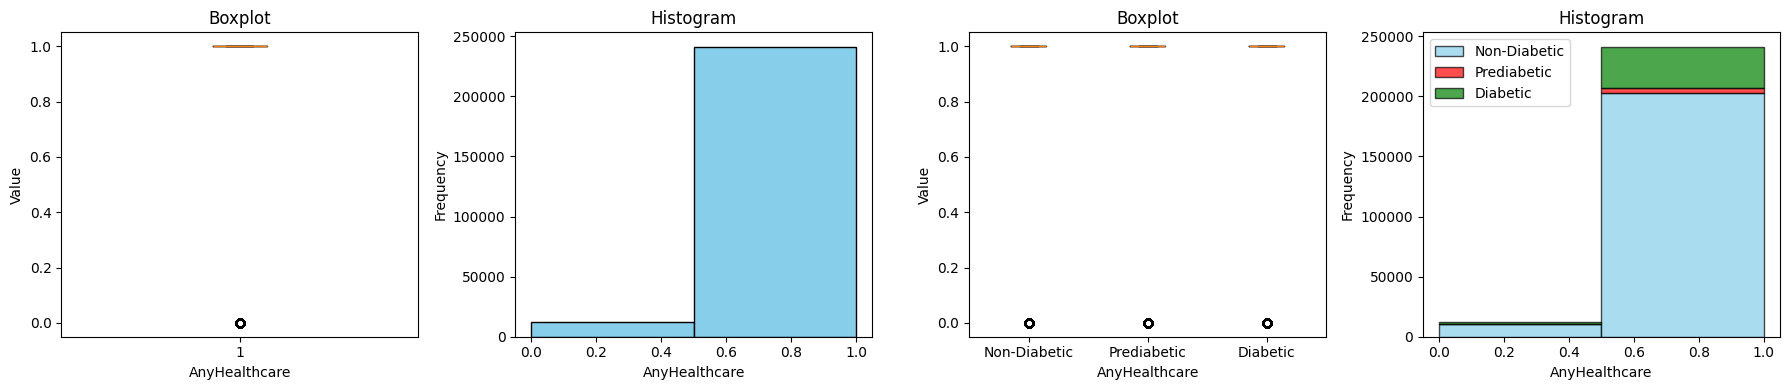

In [117]:
view_binary(df,'AnyHealthcare')

In [85]:
print (df[df.AnyHealthcare == 1].shape[0])
print (df[df.AnyHealthcare == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.AnyHealthcare == 1].shape[0] - df[df.AnyHealthcare == 0].shape[0])))

241263
12417
Difference between the two values is 228846


### NoDocbcCost
#### Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

Seemingly irrelevant to prediction

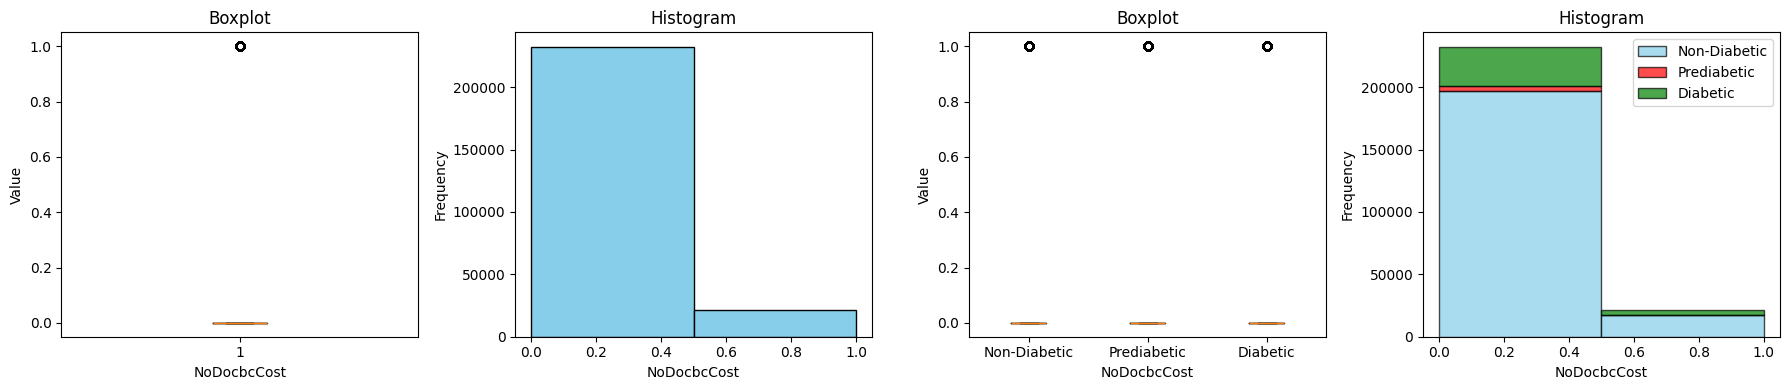

In [118]:
view_binary(df,'NoDocbcCost')

In [86]:
print (df[df.NoDocbcCost == 1].shape[0])
print (df[df.NoDocbcCost == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.NoDocbcCost == 1].shape[0] - df[df.NoDocbcCost == 0].shape[0])))

21354
232326
Difference between the two values is 210972


### DiffWalk
#### Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

The only non-diabetics that reported difficulty walking were outliars

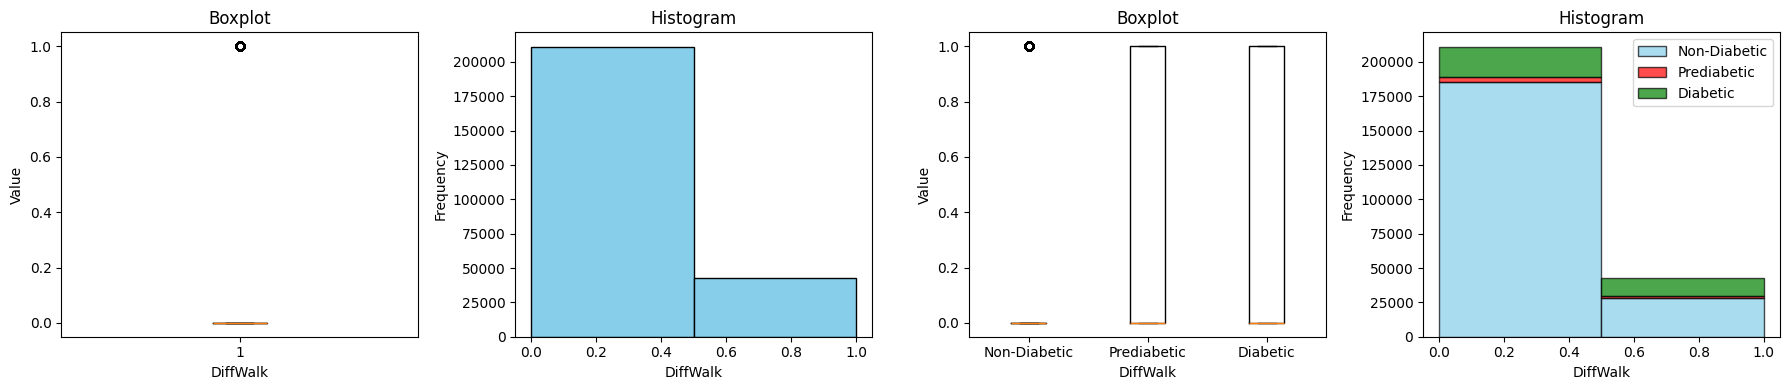

In [119]:
view_binary(df,'DiffWalk')

In [87]:
print (df[df.DiffWalk == 1].shape[0])
print (df[df.DiffWalk == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.DiffWalk == 1].shape[0] - df[df.DiffWalk == 0].shape[0])))

42675
211005
Difference between the two values is 168330


### Sex

Seemingly irrelevant to prediction

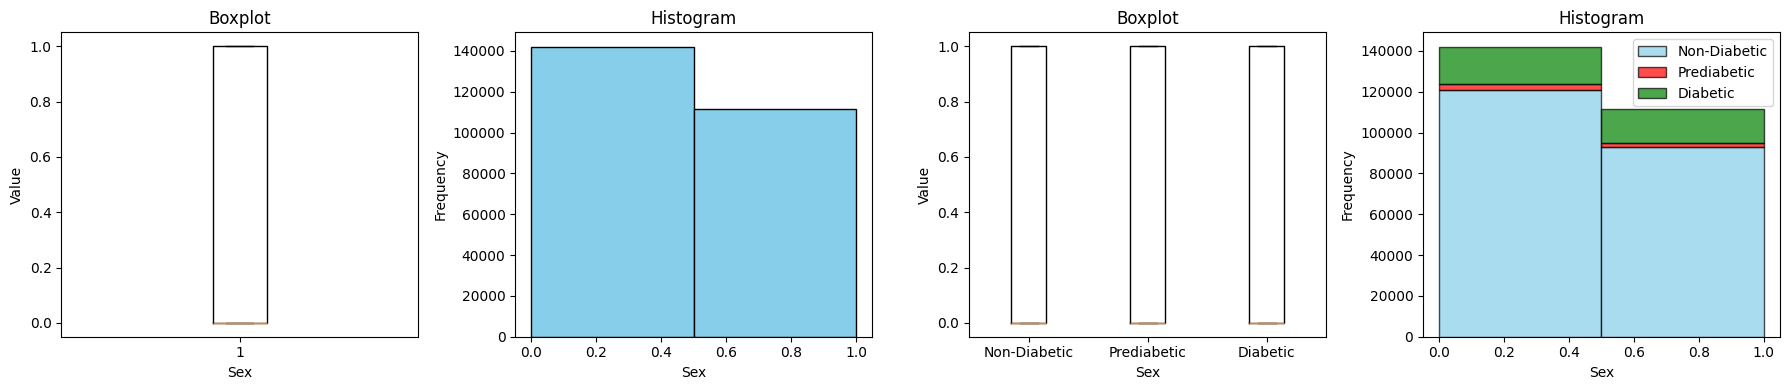

In [120]:
view_binary(df,'Sex')

In [88]:
print (df[df.Sex == 1].shape[0])
print (df[df.Sex == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Sex == 1].shape[0] - df[df.Sex == 0].shape[0])))

111706
141974
Difference between the two values is 30268


## Continuous

### BMI

Something resembling a standard distribution can be seen, but too many values are away from the mean and median

Prediabetics and diabetics tend to have a higher BMI on average than non-diabetics

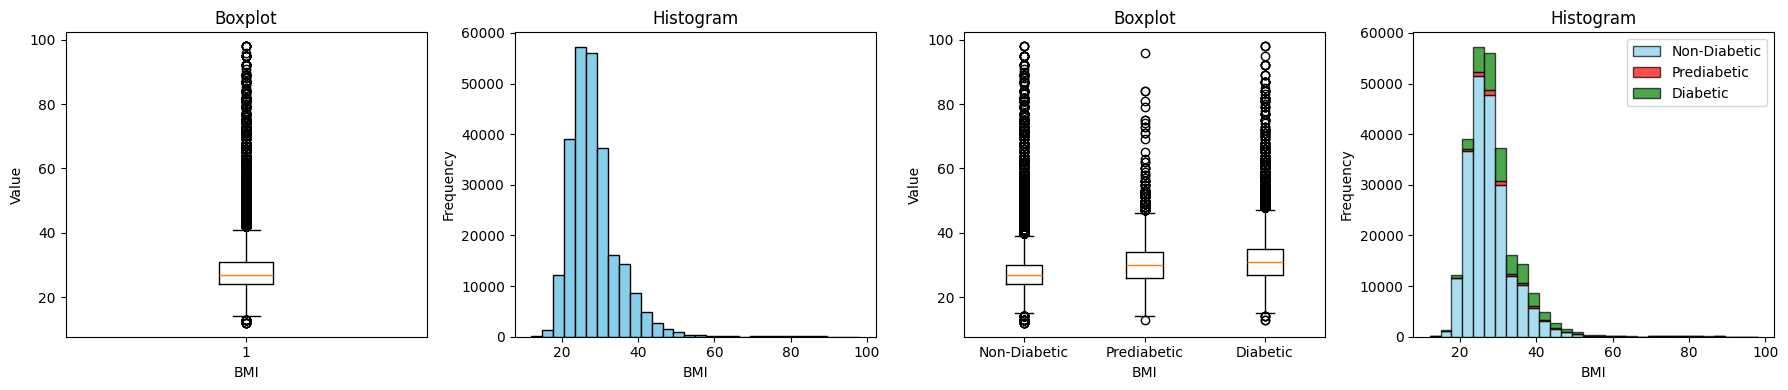

In [99]:
view_continuous(df,"BMI")

In [ ]:
col_summary(df,"BMI")

Mean: 28.382363607694735
Standard Deviation: 6.608694201406008
Median: 27.0
Min: 12.0
Max: 98.0


### General Health
#### Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

The worse the health of an individual, the more likely they are to be diabetic or prediabetic

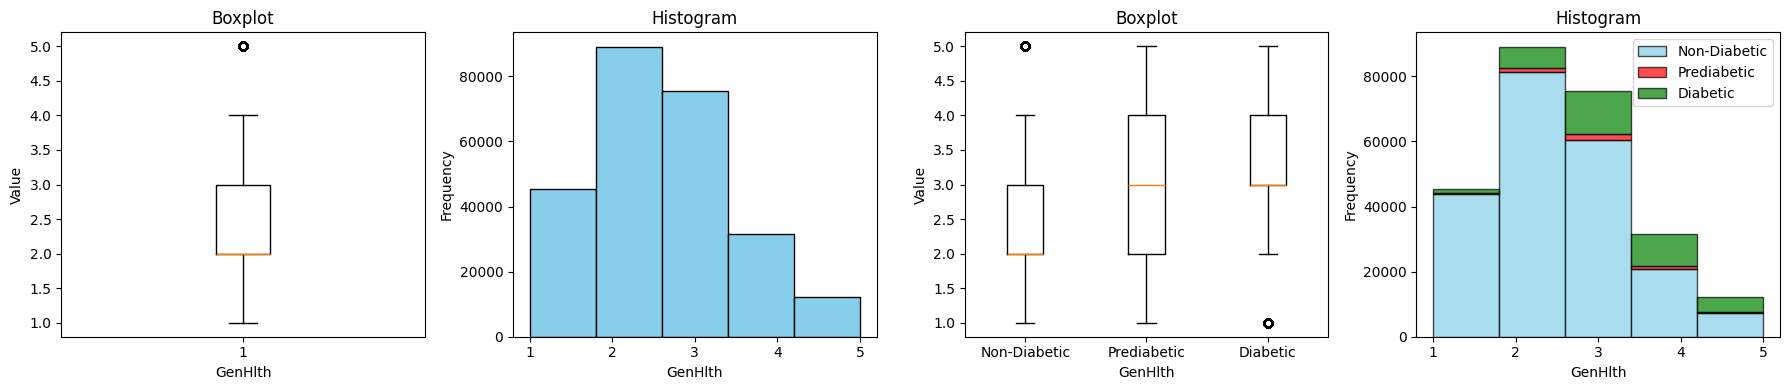

In [100]:
view_continuous(df,'GenHlth',5)

In [61]:
col_summary(df,"GenHlth")

Mean: 2.5113923052664773
Standard Deviation: 1.0684773622803934
Median: 2.0
Min: 1.0
Max: 5.0


### Mental Health
#### Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

The most variance in mental health came from prediabetics. There is an implied relationship between mental helth and diabetes, but it is not too clear

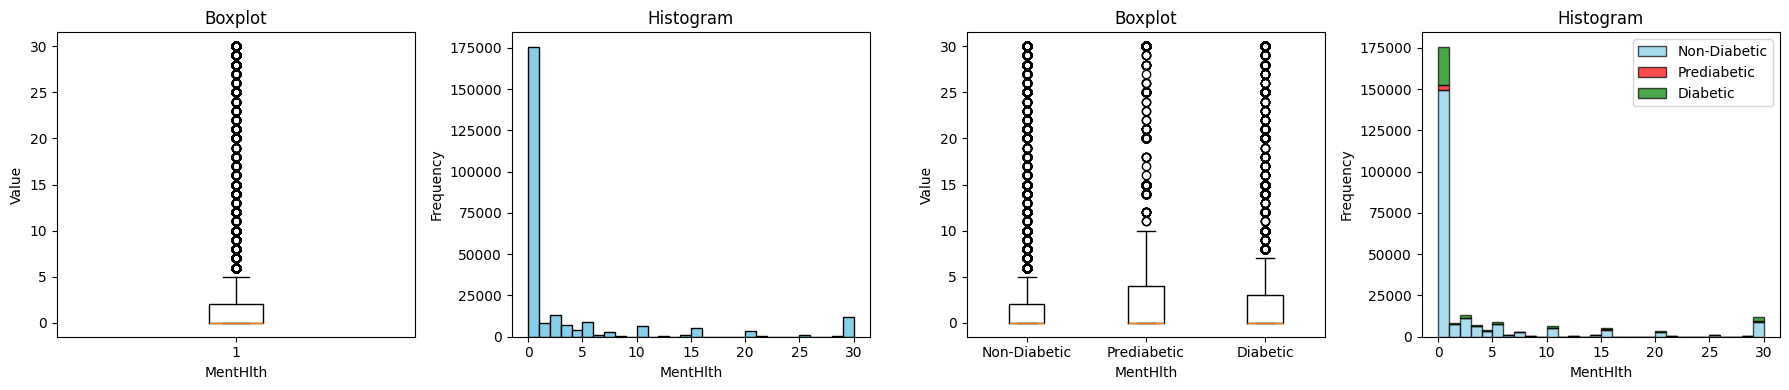

In [101]:
view_continuous(df,'MentHlth')

In [62]:
col_summary(df,"MentHlth")

Mean: 3.1847721538946705
Standard Deviation: 7.412846696196173
Median: 0.0
Min: 0.0
Max: 30.0


### Physical Health
#### Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

People who reported more days of feeling physically unwell were more likely to report diabetes or prediabetes

Due to the lopsidedness of the data, it seems more fitting to split this feature into one binary feature indicating whether or not a person had any physical health complications over the last 30 days

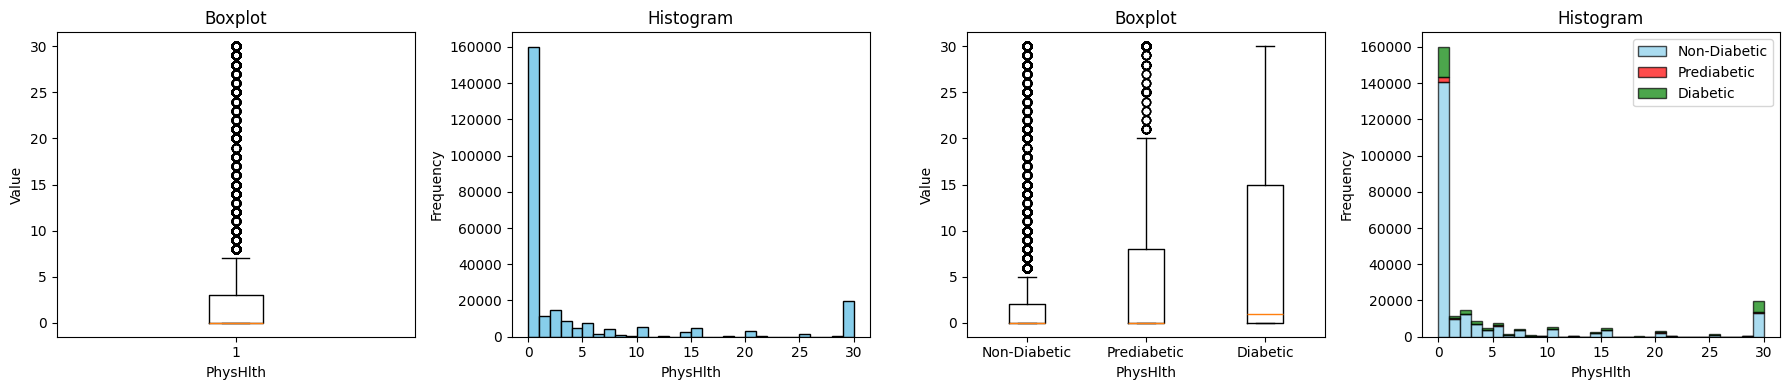

In [102]:
view_continuous(df,'PhysHlth')

In [87]:
df[df.PhysHlth == 0].shape[0]

160052

In [64]:
col_summary(df,'PhysHlth')

Mean: 4.2420805739514345
Standard Deviation: 8.717951307175127
Median: 0.0
Min: 0.0
Max: 30.0


In [88]:
df["Healthy"] = np.where(df["PhysHlth"] == 0, 1, 0)

Diabetics were notably more likely than non-diabetics and prediabetics to report any form of physical unwellness

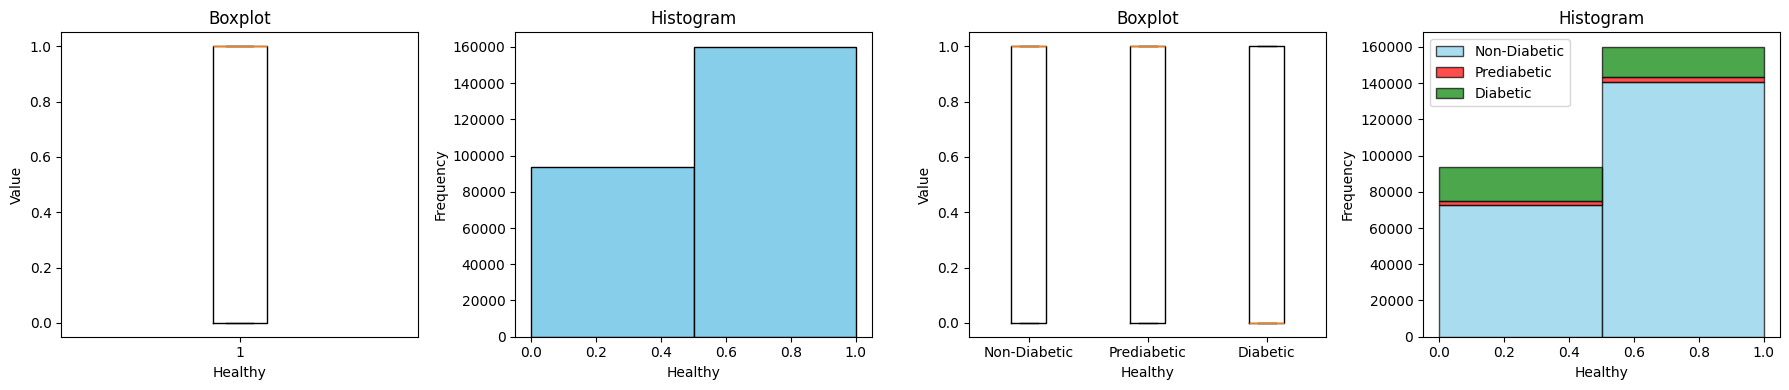

In [121]:
view_binary(df,'Healthy')

### Age
#### Each 5 year age group gets a number where higher scores means older ages

Age increased likelihood of diabetes slightly

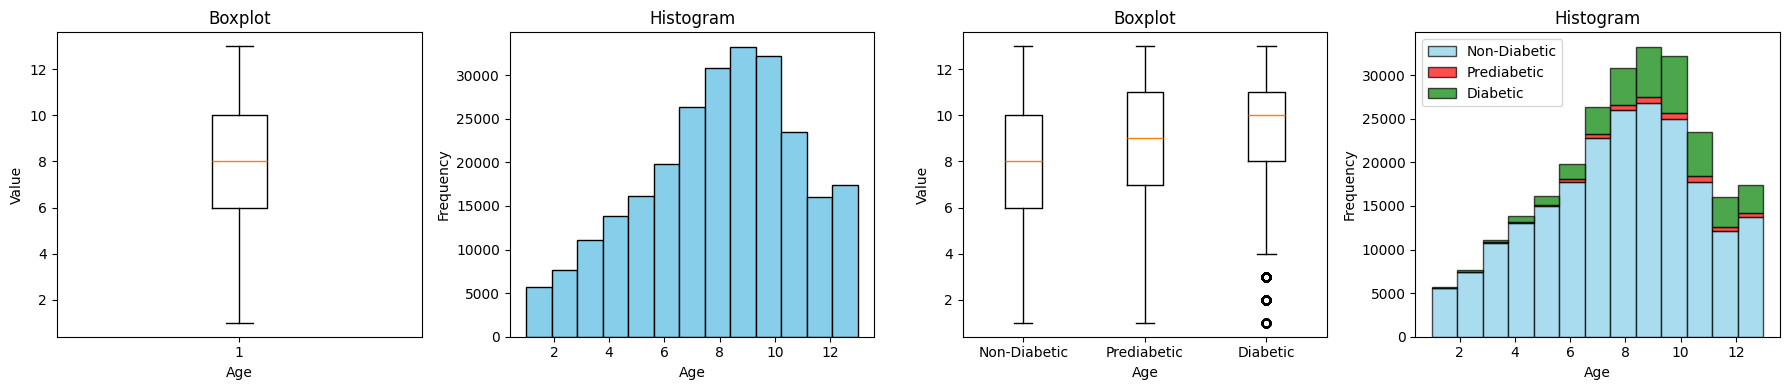

In [122]:
view_continuous(df,'Age',13)

In [70]:
col_summary(df,'Age')

Mean: 8.032119205298013
Standard Deviation: 3.054220434168484
Median: 8.0
Min: 1.0
Max: 13.0


### Education
#### 1 means never attended school or kindergarten and 6 means being in college for 4 years or more

Seemingly irrelevant, but actually has an impact when we consult the heatmap

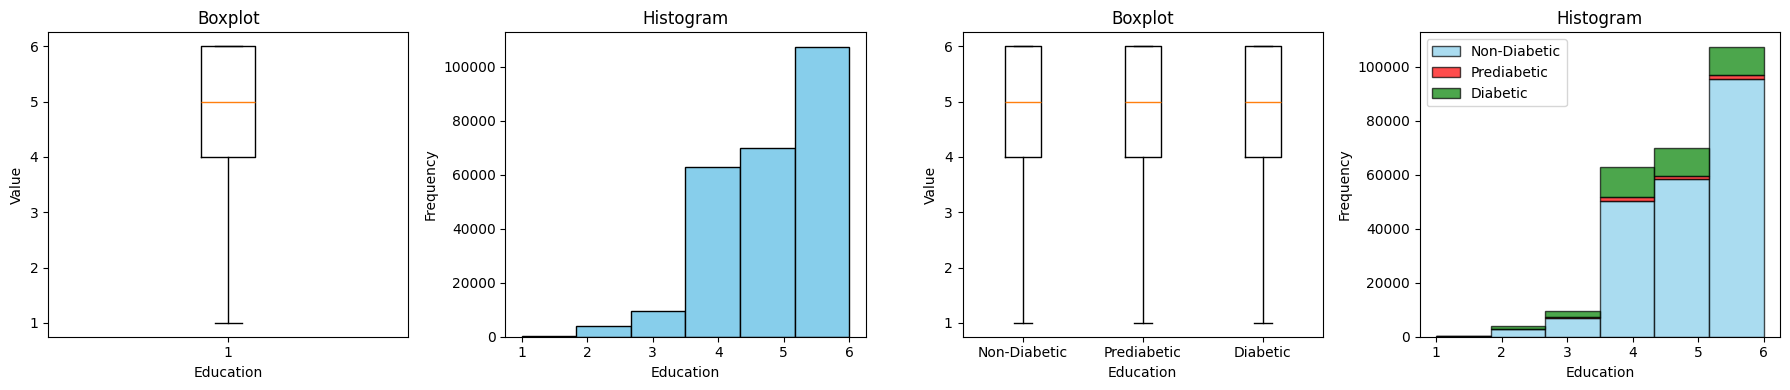

In [104]:
view_continuous(df,'Education',6)

In [72]:
col_summary(df,'Education')

Mean: 5.050433617155472
Standard Deviation: 0.9857741757276509
Median: 5.0
Min: 1.0
Max: 6.0


### Income
#### Income scale 1-8. 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more 

The higher the income, the lower the risk of diabetes

C:\Users\focka\AppData\Local\Temp\ipykernel_14756\3094797228.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


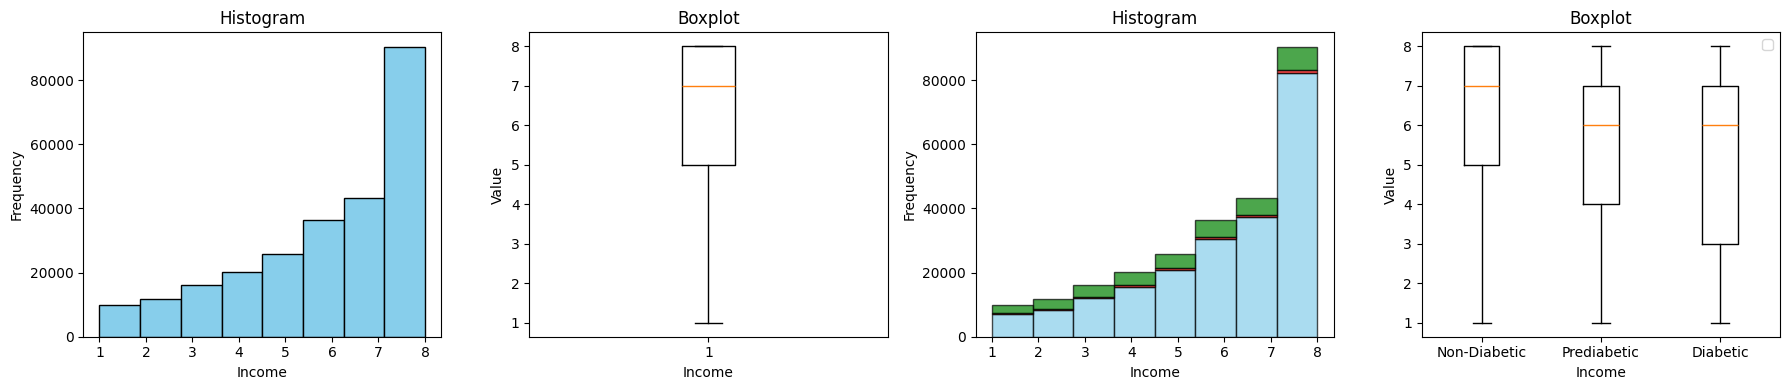

Mean: 6.053874960580258
Standard Deviation: 2.0711475662715184
Median: 7.0
Min: 1.0
Max: 8.0


In [90]:
view_continuous(df,'Income',8)
col_summary(df,'Income')

## Correlation Matrix

Naturally, general health is the best indicator of diabetes, but factors like income, education, and blood pressure play important roles as can be seen.

CholCheck, Smoker, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, MentHlth, and Sex All play very minimal roles in affecting chance for diabetes prediction, therefore, they will be removed from the final dataset

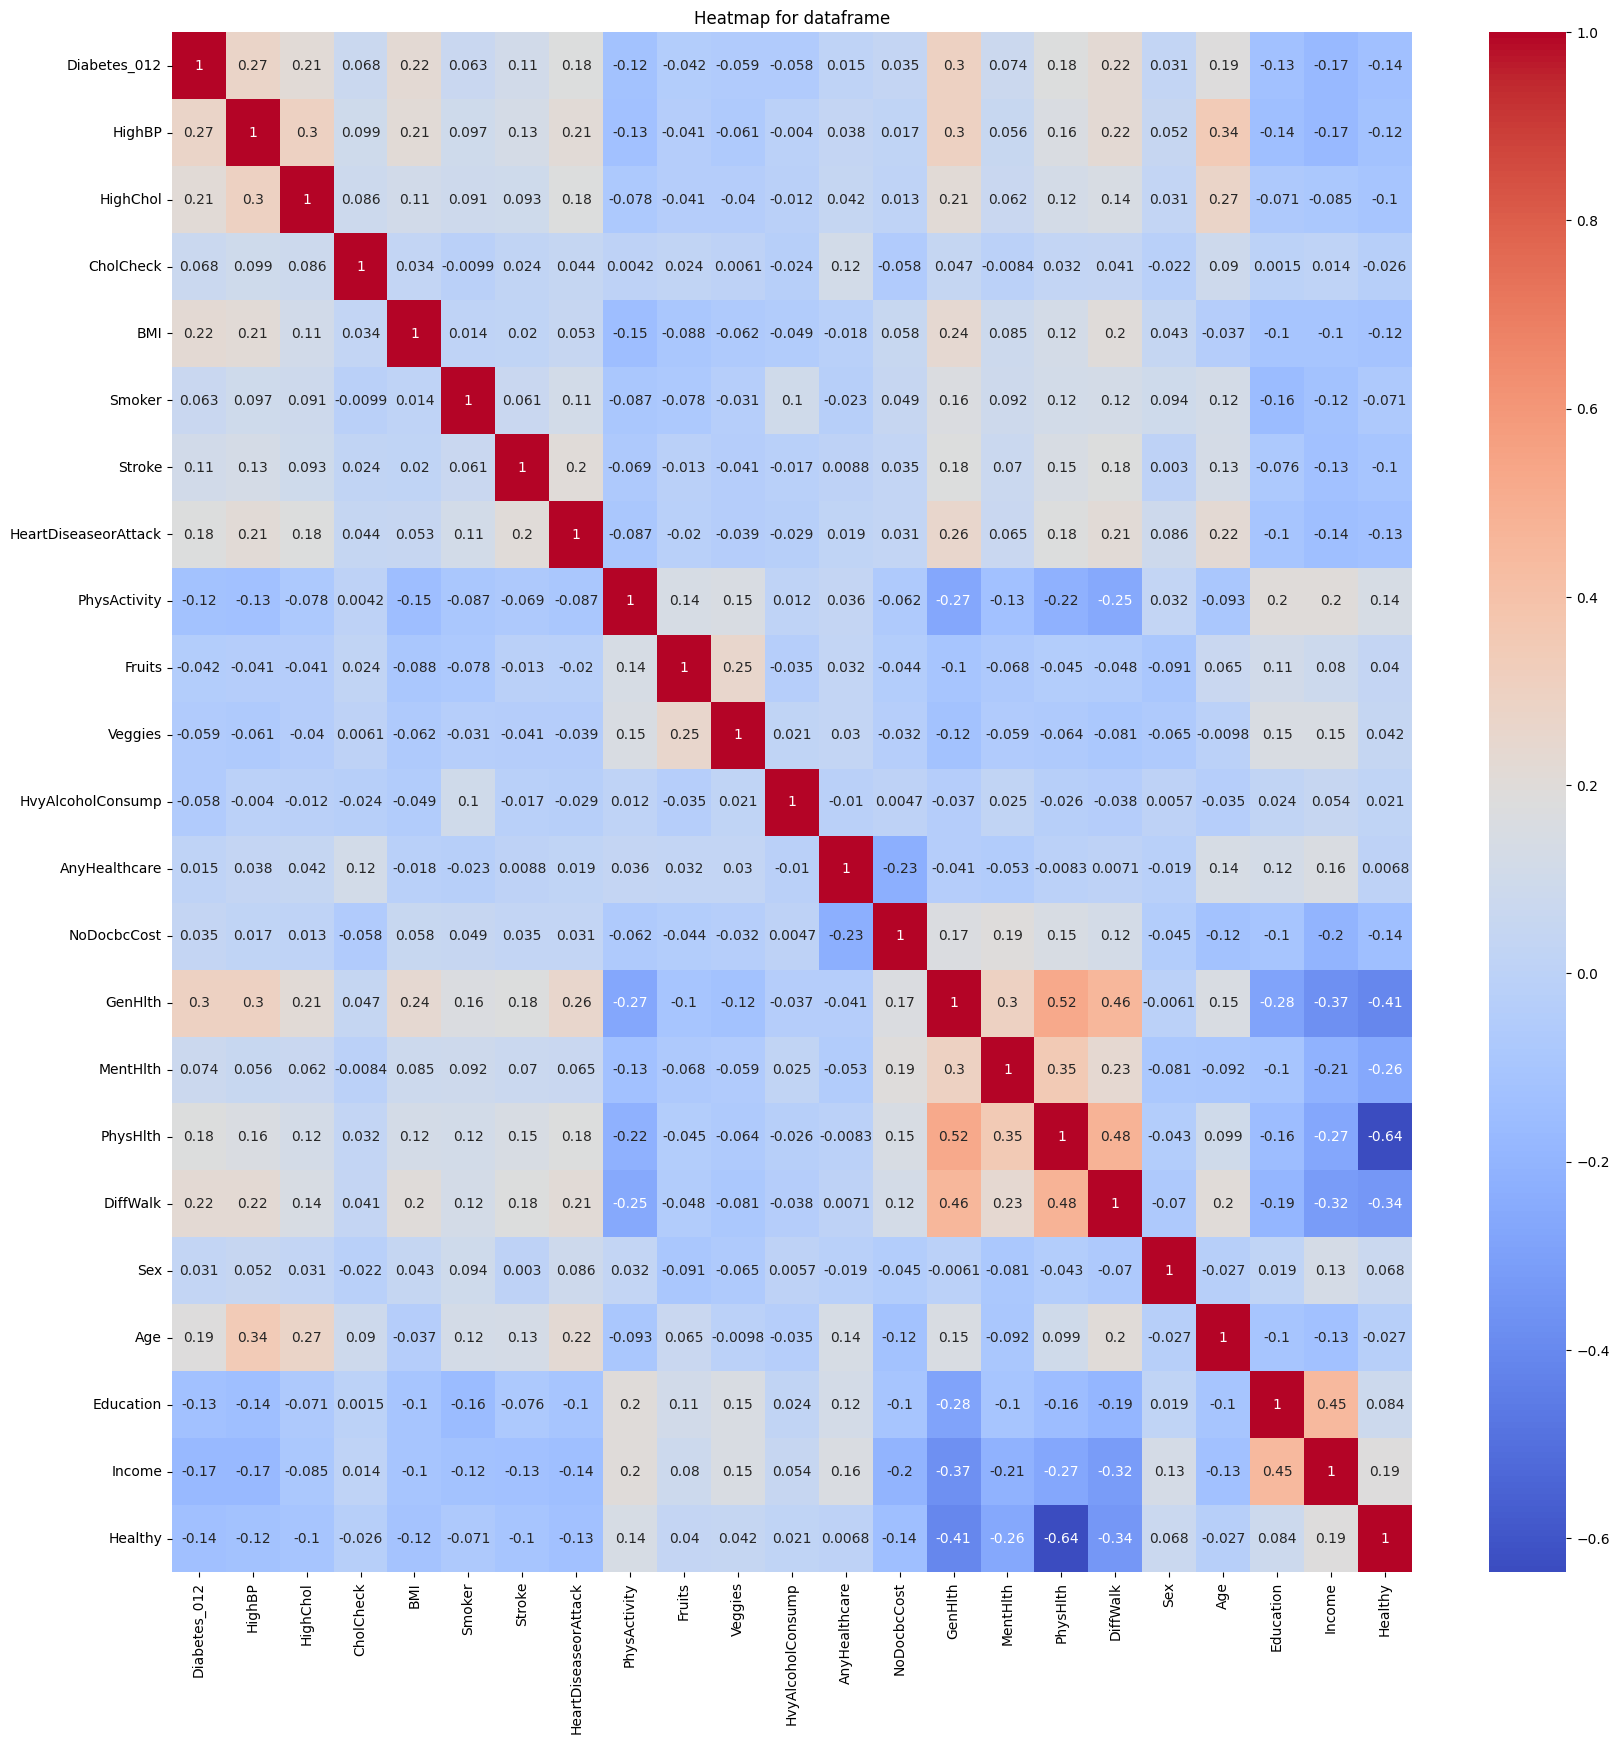

In [123]:
draw_heat_graph(df)

In [127]:
df_trimmed = df.drop(['CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex','PhysHlth'],axis=1)

# Scale Values

In [ ]:
df_test = df_trimmed.copy()

## Function Definitions

In [161]:
def scale_standard(df,col):
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

In [139]:
def scale_robust(df,col):
    df[col] = RobustScaler().fit_transform(df[col].values.reshape(-1, 1))

In [156]:
def scale_quantile(df,col):
    df[col] = QuantileTransformer(n_quantiles=len(df[col].unique()),output_distribution='normal').fit_transform(df[col].values.reshape(-1, 1))

In [131]:
def scale_log(df,col):
    df[col] = np.log(df[col])

In [142]:
df_trimmed.describe()

,Diabetes_012,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,DiffWalk,Age,Education,Income,Healthy
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,28.382364,0.040571,0.094186,0.756544,2.511392,0.168224,8.032119,5.050434,6.053875,0.630921
std,0.698160,0.494934,0.494210,6.608694,0.197294,0.292087,0.429169,1.068477,0.374066,3.054220,0.985774,2.071148,0.482556
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,2.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,2.000000,0.000000,8.000000,5.000000,7.000000,1.000000
75%,0.000000,1.000000,1.000000,31.000000,0.000000,0.000000,1.000000,3.000000,0.000000,10.000000,6.000000,8.000000,1.000000
max,2.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,5.000000,1.000000,13.000000,6.000000,8.000000,1.000000


The yeo-johnson transformer was used to reduce skew on the BMI column then followed up by a robust scaler

Every other non-binary feature used a robust scaler since reducing skew was impractical

In [191]:
df_test = df_trimmed.copy()

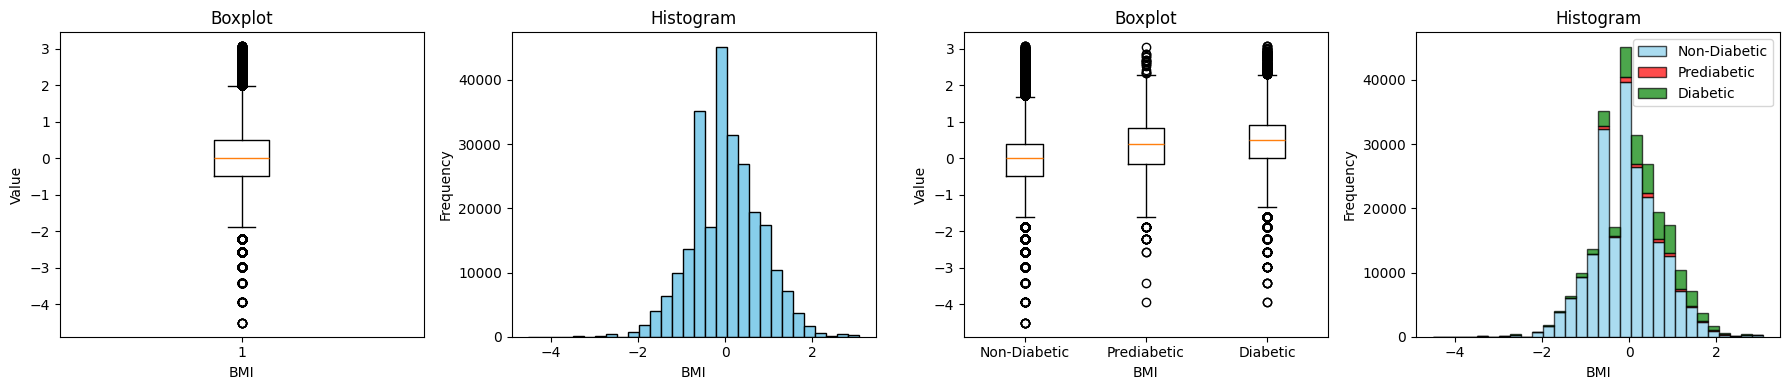

In [192]:
#len(df_test['BMI'].unique())
df_test['BMI'] = PowerTransformer(method='yeo-johnson').fit_transform(df_test[['BMI']])
scale_robust(df_test,'BMI')
#scale_log(df_test,'BMI')
view_continuous(df_test,'BMI')

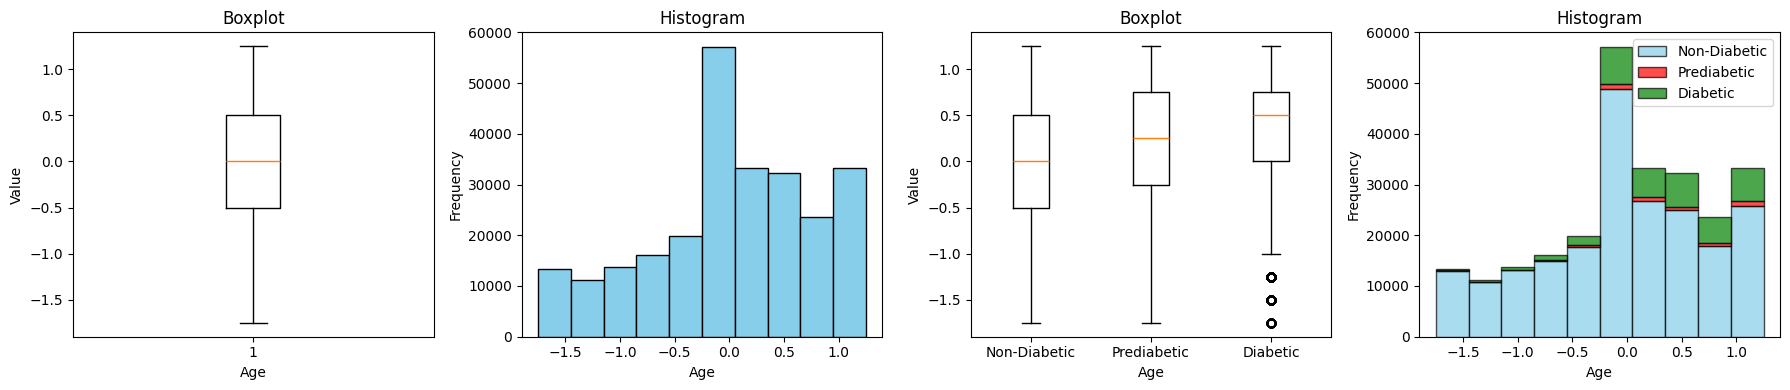

In [193]:
#df_test['Age'] = PowerTransformer(method='yeo-johnson').fit_transform(df_test[['Age']])
scale_robust(df_test,'Age')
#scale_log(df_test,'Age')
#scale_quantile(df_test,'Age')
#scale_standard(df_test,'Age')
view_continuous(df_test,'Age',10)

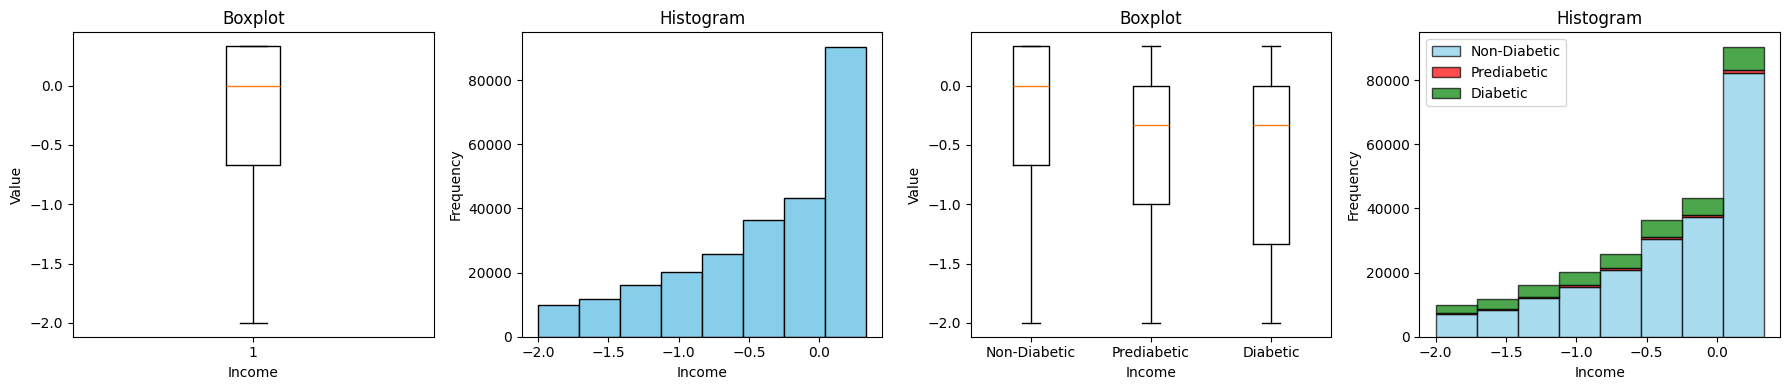

In [194]:
#df_test['Age'] = PowerTransformer(method='yeo-johnson').fit_transform(df_test[['Age']])
scale_robust(df_test,'Income')
#df_test['Income']=np.exp(df_test['Income'])
#scale_quantile(df_test,'Age')
#scale_standard(df_test,'Age')
view_continuous(df_test,'Income',8)

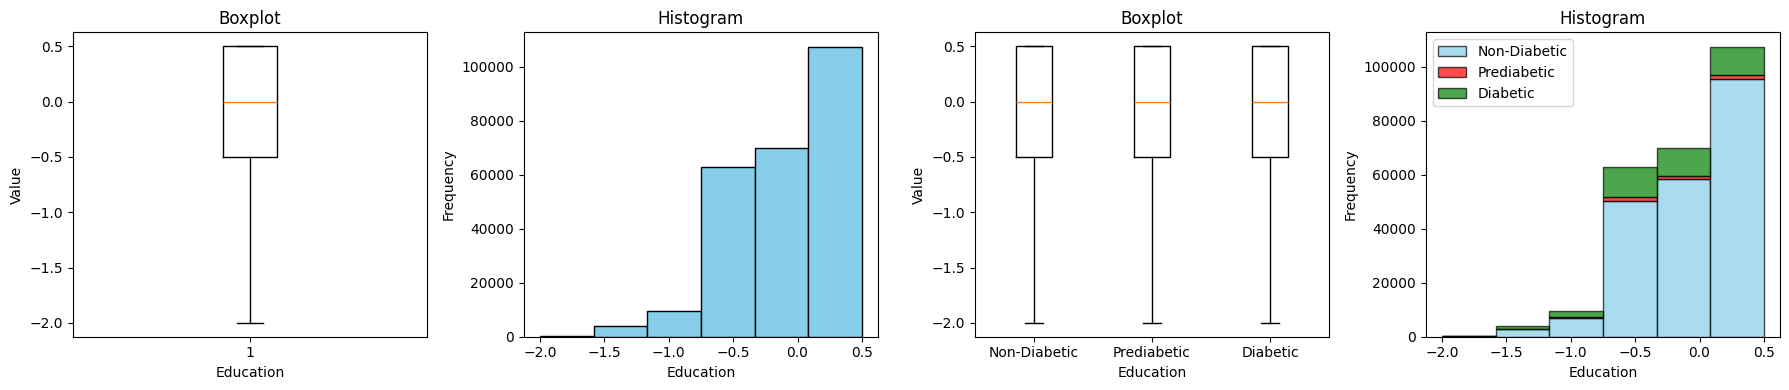

In [195]:
scale_robust(df_test,'Education')
view_continuous(df_test,'Education',6)

In [196]:
skew(df_test['BMI'])

np.float64(-0.02544185076448674)

In [197]:
skew(df_test['Age'])

np.float64(-0.359901119768877)

In [199]:
df_test.to_csv('Phase 2 data.csv')